In [7]:
%matplotlib inline

import random
from itertools import islice
from typing import Generator, Tuple, List

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set(style='whitegrid')

# Задание 2

In [9]:
def geometric_generator(p: float = 0.5) -> Generator[int, None, None]:
    while True:
        n = 0
        while random.random() > p:
            n += 1
        yield n

In [30]:
def binomial_generator(p: float = 0.5, n: int = 10) -> Generator[int, None, None]:
    while True:
        k = 0
        for i in range(n):
            if random.random() < p:
                k += 1
        yield k

## Упражнение 1.
Составить программу для вычисления выборочного среднего значения, дисперсии и относительной флуктуации для __геометрического__ распределения с параметром $p$.

Убедиться, что с увеличением $N_t = 10^3, 10^5, 10^7$ их значения стремятся к тому, что следует из теории вероятностей.

In [16]:
n_points = [10 ** 3, 10 ** 5, 10 ** 7]

In [17]:
points = np.array([np.fromiter(geometric_generator(), int, n) for n in n_points])

In [18]:
mean = np.array([np.mean(p) for p in points])
std = np.array([np.std(p) for p in points]) ** 2
rf = np.sqrt(std) / mean

df = pd.DataFrame(dict(
    n_points=n_points,
    mean=mean,
    std=std,
    rf=rf,
))
df

,n_points,mean,std,rf
0,1000,1.007000,2.288951,1.502411
1,100000,1.003600,2.003807,1.410481
2,10000000,0.999924,1.999456,1.414128


## Упражнение 2.
Составить программу для вычисления выборочного среднего значения, дисперсии и относительной флуктуации для __биномиального__ распределения с параметром $p$.

Убедиться, что с увеличением $N_t = 10^3, 10^5, 10^7$ их значения стремятся к тому, что следует из теории вероятностей.

In [19]:
n_points = [10 ** 3, 10 ** 5, 10 ** 7]

In [22]:
points = np.array([np.fromiter(binomial_generator(), int, n) for n in n_points])

In [23]:
mean = np.array([np.mean(p) for p in points])
std = np.array([np.std(p) for p in points]) ** 2
rf = np.sqrt(std) / mean

df = pd.DataFrame(dict(
    n_points=n_points,
    mean=mean,
    std=std,
    rf=rf,
))
df

,n_points,mean,std,rf
0,1000,5.011000,2.626879,0.323441
1,100000,5.002200,2.489915,0.315451
2,10000000,4.999187,2.500327,0.316300


## Упражнение 3.
Составить программу для моделирования вероятностей __геометрического__ распределения с параметрами $n$, $p$.

Провести расчет при $N_t = 10^3, 10^5, 10^7$.

Сравнить с тем, что говорит теория вероятностей.

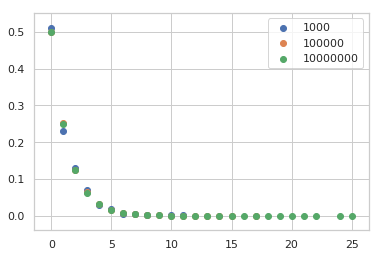

In [28]:
gen = geometric_generator()

for n in [10 ** 3, 10 ** 5, 10 ** 7]:
    points = list(islice(gen, n))
    uniques = list(sorted(set(points)))
    plt.scatter(x=uniques, y=[points.count(u) / n for u in uniques], label=f'{n}')

plt.legend()
plt.show()

## Упражнение 4.
Составить программу для моделирования вероятностей биномиального распределения с параметрами $n$, $p$.

Провести расчет при $N_t = 10^3, 10^5, 10^7$.

Сравнить с тем, что говорит теория вероятностей.

1000 computed


100000 computed


10000000 computed


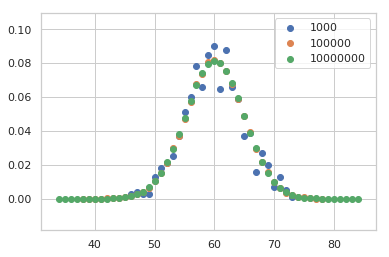

In [30]:
gen = binomial_generator(p=0.4, n=100)

for n in [10 ** 3, 10 ** 5, 10 ** 7]:
    points = list(islice(gen, n))
    uniques = list(sorted(set(points)))
    plt.scatter(x=uniques, y=[points.count(u) / n for u in uniques], label=f'{n}')
    print(f'{n} computed')

plt.legend()
plt.show()

## Упражнение 5.
Найти среднее значение и вероятности различных значений суммы очков на трех игральных кубиках.

In [55]:
def multiple_dices_generator(n_dices: int = 3) -> Generator[int, None, None]:
    choices = (1, 2, 3, 4, 5, 6)

    while True:
        yield sum(random.choices(choices, k=n_dices))


mean=10.49372


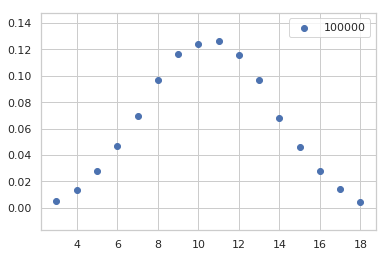

In [59]:
gen = multiple_dices_generator()

n = 10 ** 5

points = list(islice(gen, n))
uniques = list(sorted(set(points)))
plt.scatter(x=uniques, y=[points.count(u) / n for u in uniques])

print(f'mean={sum(points) / n}')

plt.legend()
plt.show()

## Упражнение 6.
Составить программу и решить задачу о флуктуациях плотности для случая $n_p = 2, n_b = 20$.

In [71]:
def molecules_batch_generator(n_cells: int = 2, n_balls: int = 20) -> Generator[Tuple[int, int], None, None]:
    while True:
        cells = [0] * n_cells
        for i in range(n_balls):
            cells[random.choice((0, 1))] += 1
        yield tuple(cells)

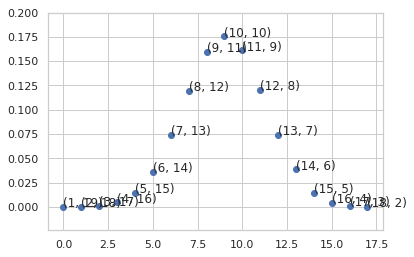

In [86]:
gen = molecules_batch_generator()
n = 10 ** 5

batches = list(islice(gen, n))

uniques = list(sorted(set(batches)))
p = [batches.count(u) / n for u in uniques]

fig, ax = plt.subplots()
ax.scatter(x=range(len(uniques)), y=p)

for (i, u) in enumerate(uniques):
    ax.annotate(f'{u}', (i, p[i]))

plt.show()

## Упражнение 7.
Провести моделирование игры в "орлянку" при нескольких $Q_1, Q_2$ и оценить:

* среднюю продолжительность игры до разорения одного из игроков
* вероятность разорения каждого игрока

In [4]:
def game_results_generator(q_1: int, q_2: int) -> Generator[Tuple[int, int], None, None]:
    """
    
    :param q_1: 
    :param q_2: 
    :return: Генератор, который возвращает пару: (Шаг на котором закончилась игра, Проигравший)
    """
    while True:
        step = 0
        current_q_1 = q_1
        current_q_2 = q_2
        while current_q_1 != 0 and current_q_2 != 0:
            if random.random() < 0.5:
                current_q_1 += 1
                current_q_2 -= 1
            else:
                current_q_1 -= 1
                current_q_2 += 1
            step += 1
        yield (step, 0 if current_q_1 == 0 else 1)

In [8]:
n = 10 ** 5

df = pd.DataFrame(dict(
    q_1=[],
    q_2=[],
    last_step=[],
    first_loose=[],
    second_loose=[]
))

for q_1 in (1, 2, 3, 4, 5):
    for q_2 in (1, 2, 3, 4, 5):
        res = list(islice(game_results_generator(q_1, q_2), n))
        df = df.append(dict(
            q_1=q_1,
            q_2=q_2,
            last_step=sum([r[0] for r in res]) / n,
            first_loose=len([r[1] for r in res if r[1] == 0]) / n,
            second_loose=len([r[1] for r in res if r[1] == 1]) / n,
        ), ignore_index=True)

df


,q_1,q_2,last_step,first_loose,second_loose
0,1.0,1.0,1.00000,0.50299,0.49701
1,1.0,2.0,2.00536,0.66706,0.33294
2,1.0,3.0,3.00794,0.75031,0.24969
3,1.0,4.0,3.99086,0.79898,0.20102
4,1.0,5.0,5.02336,0.83212,0.16788
5,2.0,1.0,1.99310,0.33218,0.66782
6,2.0,2.0,3.99246,0.50038,0.49962
7,2.0,3.0,6.02755,0.59973,0.40027
8,2.0,4.0,8.01460,0.66484,0.33516
9,2.0,5.0,9.91896,0.71580,0.28420


## Упражнение 8.
Промоделировать (распространение слухов) развитие популяции живых организмов, считая, что каждый из них за свою жизнь производит случайное количество потомков, которое описывается биномиальным распределением:

* Построить несколько случайных кривых $N(m)$ ( $N(m)$ - количество организмов в $m$ поколении) при различных значениях произведения $np$.
* Построить несколько случайных кривых $\overline{N}(m)$ ( $\overline{N}(m)$ - среднее количество организмов в $m$ поколении) при различных значениях произведения $np$.
* Вычислить вероятность вырождения при нескольких значениях произведения $np$.

### Случайные кривые

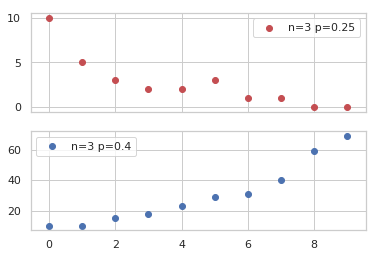

In [73]:
n_0 = 10
n_generations = 10

f, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
c = ['r', 'b']

for (i, n, p) in ((0, 3, 0.25), (1, 3, 0.4)):
    gen = binomial_generator(p, n)

    generation = [n_0]
    for _ in range(n_generations - 1):
        generation.append(sum(islice(gen, generation[-1])))

    ax[i].scatter(
        x=list(range(n_generations)),
        y=generation,
        label=f'n={n} p={p}',
        c=c[i],
    )
    ax[i].legend()

plt.show()


### Усреднённые кривые

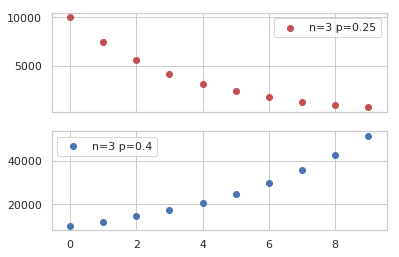

In [75]:
n_0 = 10
n_generations = 10
n_repeat = 10000

f, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
c = ['r', 'b']

for (i, n, p) in ((0, 3, 0.25), (1, 3, 0.4)):
    gen = binomial_generator(p, n)

    generations_avg = np.zeros(n_generations)
    for _ in range(n_repeat):
        generations = [n_0]
        for _ in range(n_generations-1):
            generations.append(sum(islice(gen, generations[-1])))
        generations_avg += generations

    generations_avg = [g / n_generations for g in generations_avg]

    ax[i].scatter(
        x=list(range(n_generations)),
        y=generations_avg,
        label=f'n={n} p={p}',
        c=c[i],
    )
    ax[i].legend()

plt.show()


### Вероятность вырождения

In [78]:
n_0 = 10
n_generations = 10
n_repeat = 10000

df = pd.DataFrame(dict(
    n=[],
    p=[],
    p_degeneration=[],
))

for (n, p) in ((3, 0.25), (3, 0.4)):
    gen = binomial_generator(p, n)

    p_degeneration = 0
    for _ in range(n_repeat):
        generations = [n_0]
        for _ in range(n_generations-1):
            generations.append(sum(islice(gen, generations[-1])))
        if generations[-1] == 0:
            p_degeneration += 1
    p_degeneration /= n_repeat
    
    df = df.append(dict(n=n, p=p, p_degeneration=p_degeneration), ignore_index=True)

df

,n,p,p_degeneration
0,3.0,0.25,0.6825
1,3.0,0.40,0.0011
